## Linear Regression on the California Housing dataset

## Dataset: California Housing Prices
This dataset contains information collected from the 1990 California census. The goal is to predict the median house value (MedHouseVal) in California districts based on several features.

### Features:
MedInc: Median income in block group

HouseAge: Median house age in block group

AveRooms: Average number of rooms per household

AveBedrms: Average number of bedrooms per household

Population: Block group population

AveOccup: Average number of household members

Latitude: Block group latitude

Longitude: Block group longitude

### Goal:
To predict the MedHouseVal (Median House Value) using Linear Regression.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Display the first few rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
# Select features and target
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### test_size=0.2
This defines the proportion of the dataset to include in the test split.

0.2 means 20% of the data goes to testing, and 80% goes to training.

You can also specify it as an integer number of samples.

### random_state=42
This controls the randomness of the split.

By setting random_state to a fixed number (like 42), you ensure reproducibility: the same split will happen every time you run the code.

If you omit this, the split will be random each time you run it, leading to different results.



### Scaling is not strictly required for ordinary linear regression in Scikit-Learn, because linear regression does not depend on the scale of features for predictions to be correct.

In [9]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")



Model Evaluation:
Mean Squared Error (MSE): 0.556
R² Score: 0.576


| Metric       | Value | Meaning                                                            |
| ------------ | ----- | ------------------------------------------------------------------ |
| **MSE**      | 0.556 | On average, predictions are off by about 0.745 (after square root) |
| **R² Score** | 0.576 | Model explains \~58% of the variability in housing prices          |


### Mean Squared Error (MSE)
A lower MSE means your predictions are closer to actual values.

It is always non-negative.

In your case, MSE = 0.556 means that on average, your predictions deviate from the actual house prices by √0.556 ≈ 0.745 units (in terms of the target's scale — typically in $100,000s for this dataset).

### R² Score (Coefficient of Determination)
Ranges from 0 to 1 (sometimes can be negative if the model is worse than simply predicting the mean).

R² = 1.0: Perfect model — explains 100% of the variance.

R² = 0.0: Model explains nothing — predictions are no better than the mean.

R² = 0.576 means your model explains 57.6% of the variance in house prices using the input features.

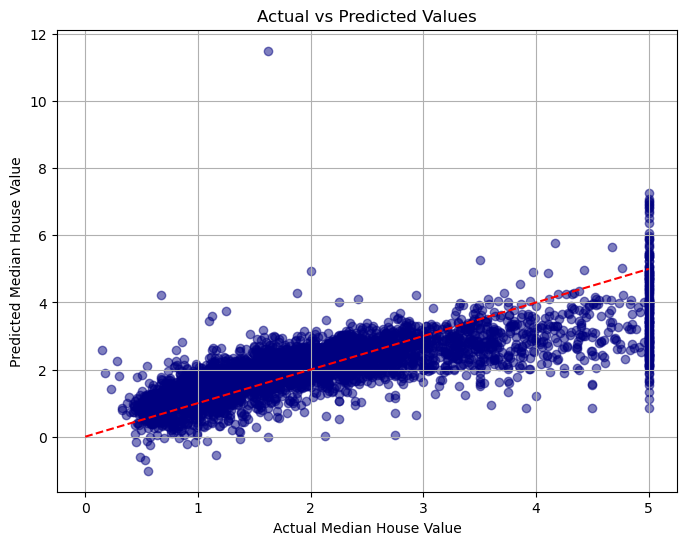

In [15]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='navy')
plt.plot([0, 5], [0, 5], color='red', linestyle='--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [24]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)